In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


from sklearn.linear_model import LinearRegression


# data description

In [68]:
housing = pd.read_csv(r'D:\msc3\machine learning\lab8\housing.csv')
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [69]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [70]:
print("Number of data:"+str(len(housing.index)))

Number of data:506


In [71]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [72]:
housing.isnull().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A71DC6C08>,
      dtype=object)

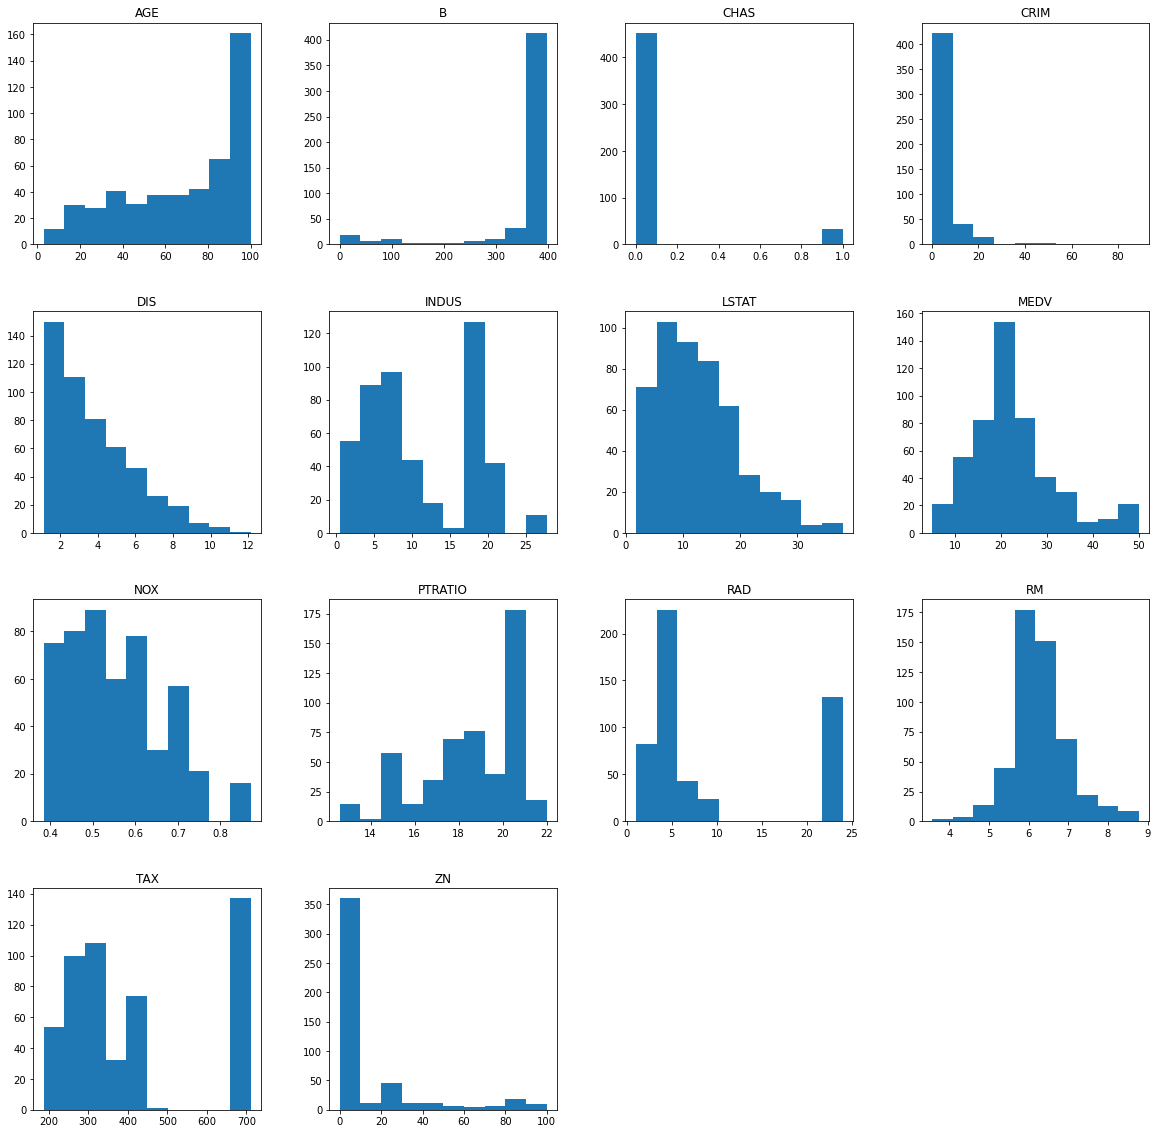

In [73]:
housing.hist(bins=10,figsize=(20,20),grid=False)

# data preprocessing

In [74]:
housing.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [75]:
housing.fillna(housing.mean(), inplace=True)

In [76]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [77]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

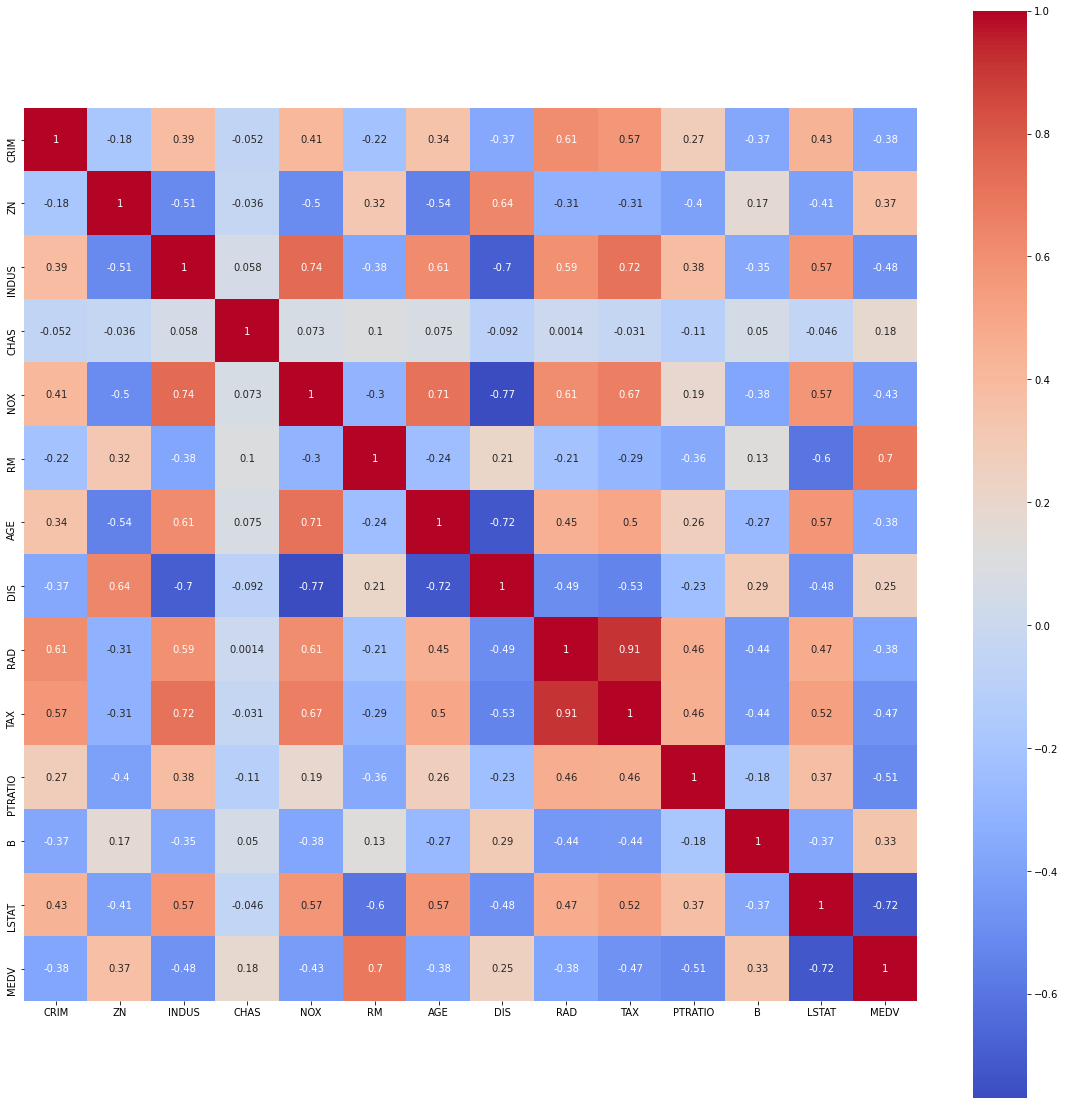

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(housing[housing.columns].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

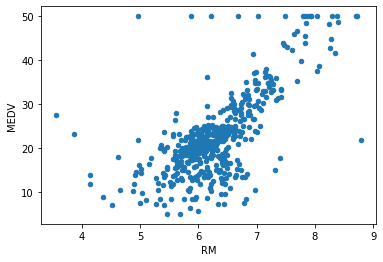

In [79]:
housing.plot.scatter('RM', 'MEDV')

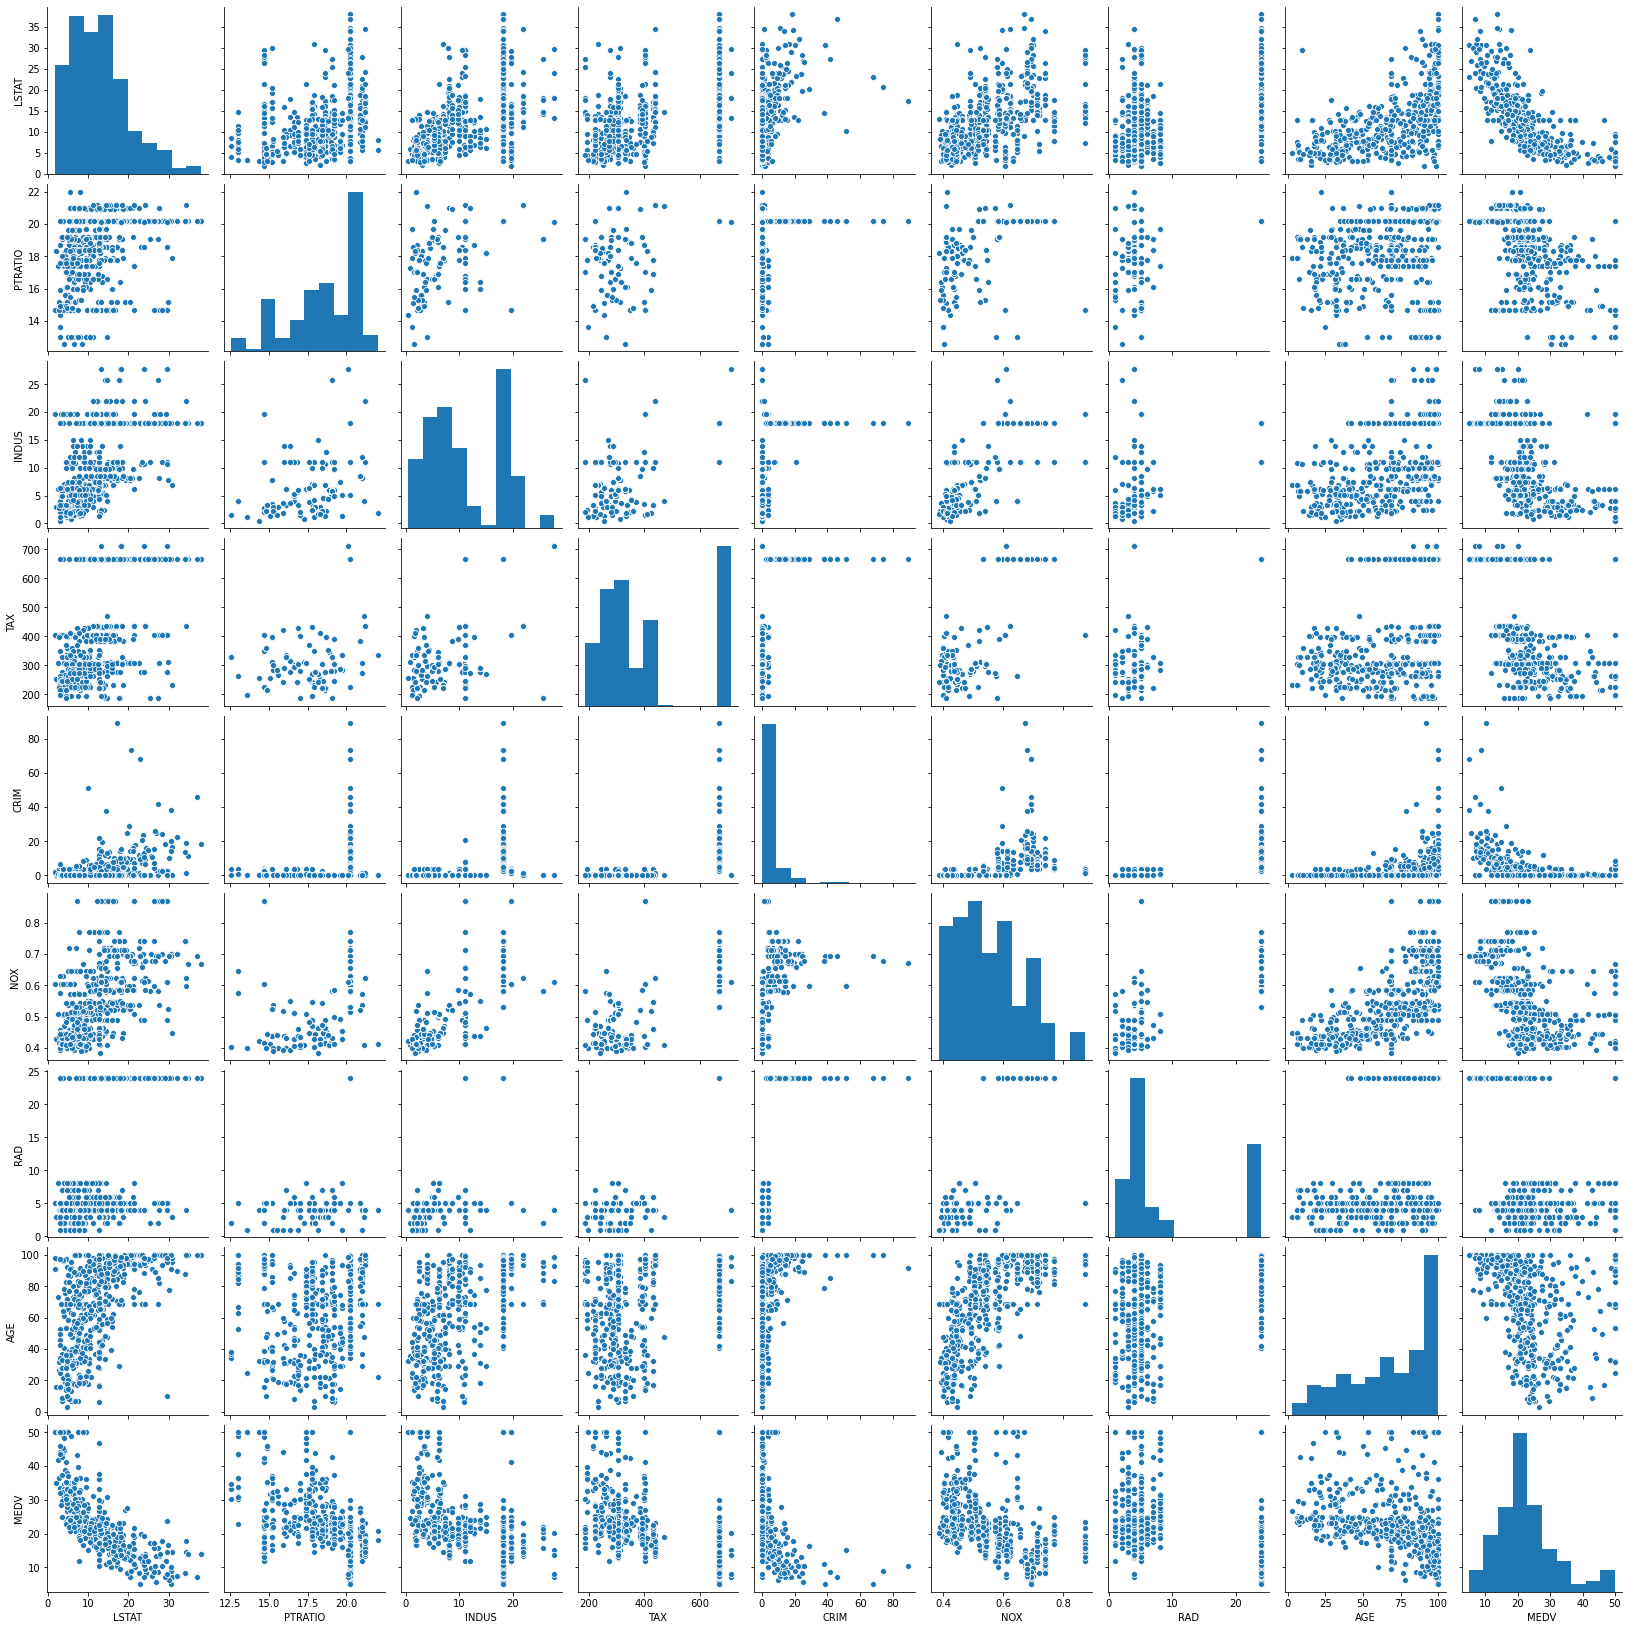

In [80]:
sns.pairplot(housing, vars = ['LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'CRIM', 'NOX', 'RAD', 'AGE', 'MEDV'])

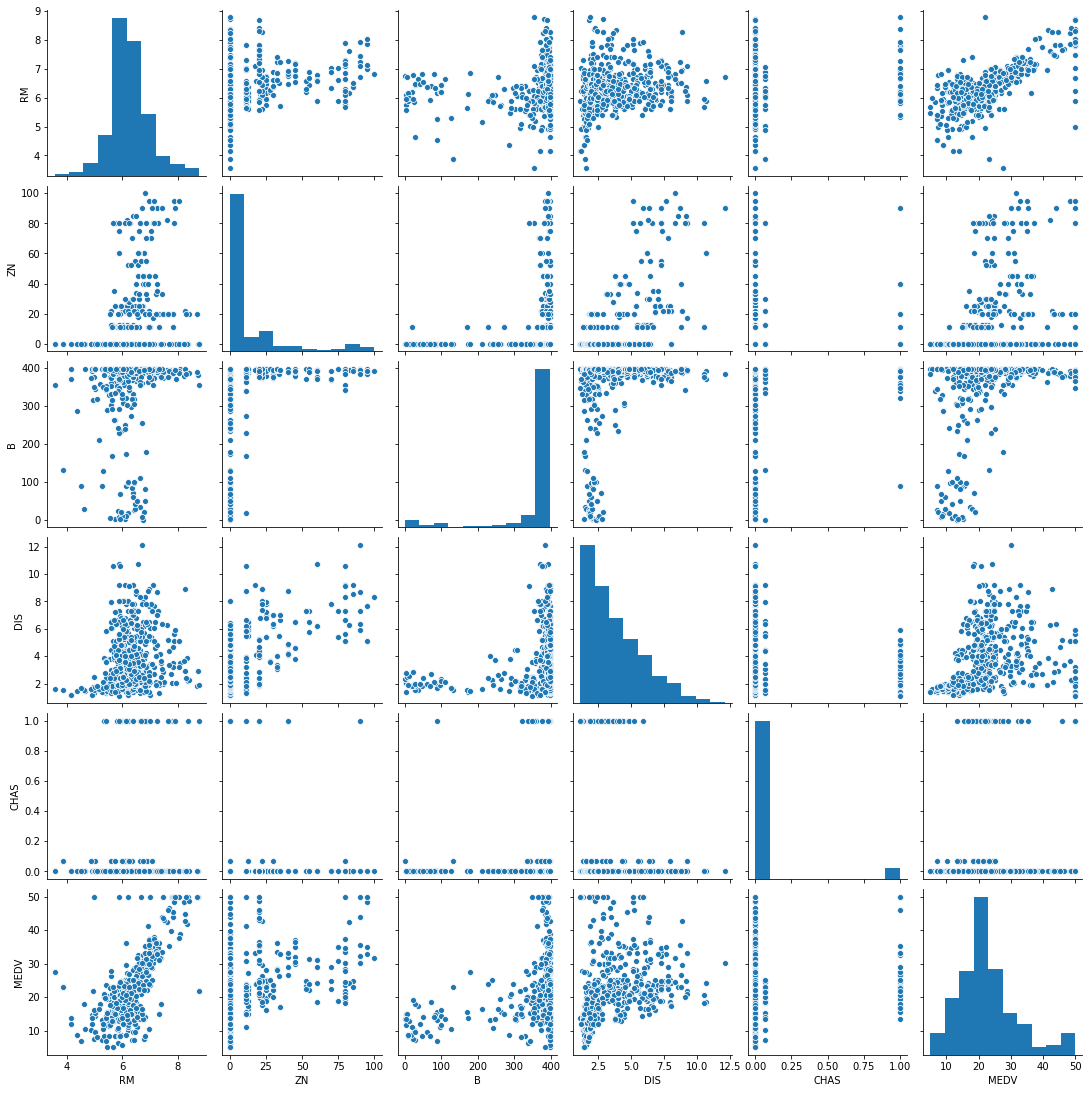

In [81]:
sns.pairplot(housing, vars = ['RM', 'ZN', 'B', 'DIS', 'CHAS','MEDV'])

In [82]:
X=housing.drop("MEDV",axis=1)
y=housing["MEDV"]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [84]:
from sklearn.linear_model import LinearRegression

# linear regression

In [85]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [86]:
predictions = lm.predict(X_test)

# linear regression results

Text(0, 0.5, 'Predicted Y')

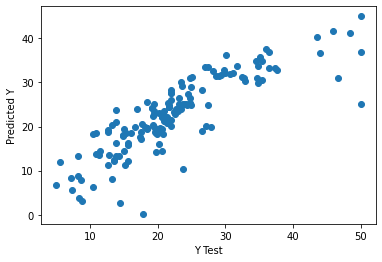

In [87]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [88]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.519967422579463
MSE: 24.648522189830697
RMSE: 4.964727806217648


In [89]:
print('\nIntercept : ',lm.intercept_)


Intercept :  35.66136284369268


In [90]:
print('Variance score: ',lm.score(X_test, y_test))

Variance score:  0.7143713037591916


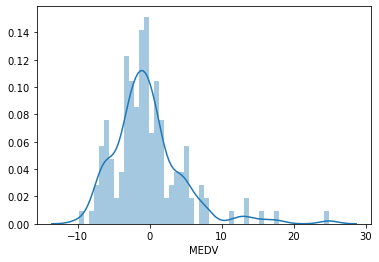

In [91]:
sns.distplot((y_test-predictions),bins=50);

In [92]:
accuracy = lm.score(X_train, y_train)
print("accuracy = ", accuracy * 100, "%")
accuracy = lm.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  73.16334858739746 %
accuracy =  71.43713037591915 %


In [93]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.098965
ZN,0.028741
INDUS,-0.077475
CHAS,3.580316
NOX,-13.928879
RM,3.709667
AGE,0.001627
DIS,-1.362978
RAD,0.291508
TAX,-0.009511


# Synthetic dataset

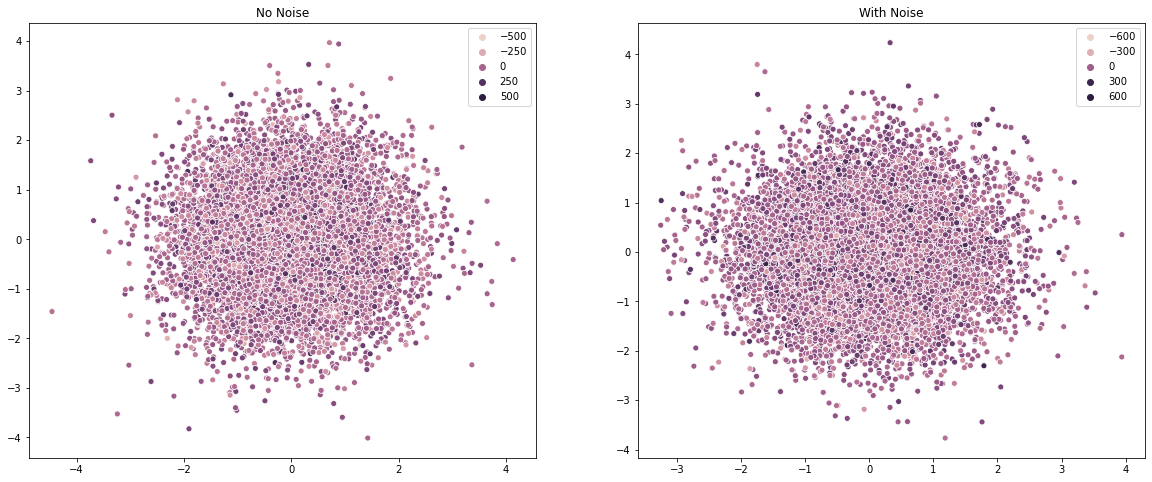

In [94]:
from sklearn.datasets import make_regression as mr
# Generate Clean data
X,y = mr(n_samples=10000, n_features=10, n_informative=2, random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
# Generate noisy Data
X,y = mr(n_samples=10000, n_features=10, n_informative=2, noise=20, random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("With Noise");
plt.show();

# Noiseless data

In [148]:
A,Z = mr(n_samples=10000, n_features=10, n_informative=2, random_state=17)

In [96]:
df=pd.DataFrame(A)
df

,0,1,2,3,4,5,6,7,8,9
0,-0.528957,-0.214593,0.074201,0.317663,-0.177406,0.683807,-1.067066,0.293464,-0.615365,-0.436058
1,-0.268805,0.583482,-0.456163,0.570108,-0.179749,-2.145147,0.206286,0.196781,1.988881,-2.212377
2,-0.569527,0.409039,-1.164657,0.138132,-0.526564,-1.460420,0.275581,-2.278527,1.429828,-0.177089
3,-0.248366,-1.762342,-0.140821,-1.734415,1.964524,-0.080384,-0.112557,2.368334,-1.733349,0.354090
4,0.200572,-1.053115,0.591931,0.708054,-0.765569,0.424510,0.689100,-0.436887,0.289387,0.225677
...,...,...,...,...,...,...,...,...,...,...
9995,0.550839,0.574948,-1.091812,-0.966188,1.443319,1.543396,1.030029,0.899440,-1.500649,0.572351
9996,-0.258148,-0.288071,0.973084,-0.015755,-0.534004,-0.239317,1.546321,-1.411464,-0.898505,-3.129165
9997,-0.204986,0.307516,1.395662,0.993531,-1.477036,-0.041557,1.177534,0.152798,0.871737,-0.311219
9998,-0.559787,0.182400,-0.019461,0.392112,0.111563,-0.185284,-0.944699,-0.867091,-0.697704,0.214617


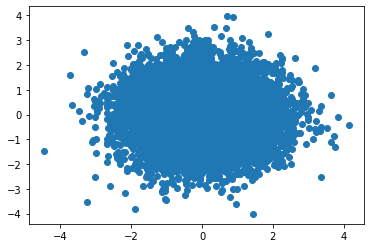

In [97]:
df=pd.DataFrame(A)
plt.scatter(df[0],df[1])
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
A_train, A_test, z_train, z_test = train_test_split(A,Z,test_size=0.3, random_state=2)

In [99]:
lm = LinearRegression()
lm.fit(A_train,z_train)

LinearRegression()

In [103]:
prediction = lm.predict(A_test)

Text(0, 0.5, 'Predicted Y')

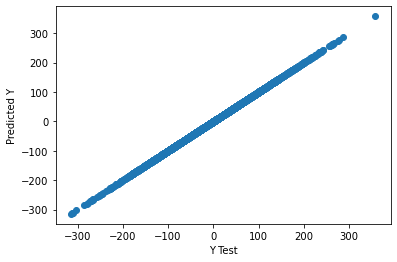

In [104]:
plt.scatter(z_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [105]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(z_test, prediction))
print('MSE:', metrics.mean_squared_error(z_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(z_test, prediction)))

MAE: 3.466236325744276e-14
MSE: 1.9194207552613397e-27
RMSE: 4.381119440578332e-14


In [106]:
print('\nIntercept : ',lm.intercept_)


Intercept :  4.218847493575595e-15


In [107]:
print('Variance score: ',lm.score(A_test, z_test))

Variance score:  1.0


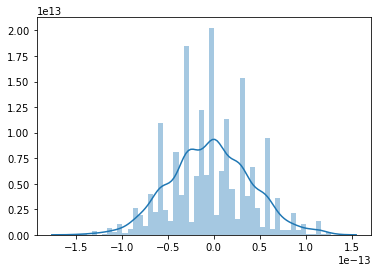

In [108]:
sns.distplot((z_test-prediction),bins=50);

In [109]:
accuracy = lm.score(A_train, z_train)
print("accuracy = ", accuracy * 100, "%")
accuracy = lm.score(A_test, z_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  100.0 %
accuracy =  100.0 %


# Noisy data

In [136]:
B,w = mr(n_samples=10000, n_features=10, n_informative=2, noise=20, random_state=17)

In [137]:
df=pd.DataFrame(B)
df

,0,1,2,3,4,5,6,7,8,9
0,-1.027619,-1.286558,-1.101747,-0.262808,0.304828,0.149726,-1.739105,0.835792,-0.638274,2.068825
1,1.090157,1.386052,1.475800,0.214197,-0.625391,2.218678,0.641034,-0.339901,0.718192,-0.762642
2,-0.501386,-1.071103,0.710173,-1.273405,1.375302,-0.177287,1.094835,0.150014,0.005352,0.320013
3,-0.903947,0.877845,-0.319021,-0.823712,-0.517133,-0.814930,-0.025050,-3.061606,0.465944,-0.741907
4,-1.693394,-1.037866,0.622906,2.972829,0.395215,0.367769,-0.488113,1.632435,-0.903692,-0.289823
...,...,...,...,...,...,...,...,...,...,...
9995,-0.787534,-1.125008,-0.153964,-0.236301,-0.384459,-0.375466,-0.323895,-0.399361,-1.571562,0.783742
9996,1.430434,1.231598,0.878692,-0.228201,0.337200,0.864389,-0.722447,0.583020,-0.336605,-1.204862
9997,-1.002945,-0.645842,-0.966706,-0.944122,0.531353,1.759356,-1.944453,1.770926,0.048891,-0.836193
9998,-1.315852,-0.013712,-1.973863,-0.265874,-0.873708,-0.330170,-0.329684,0.334905,-0.454224,0.809742


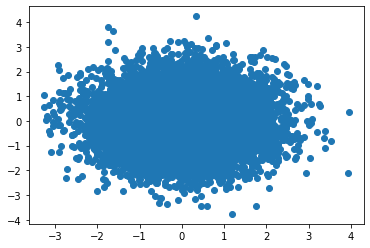

In [138]:
df=pd.DataFrame(B)
plt.scatter(df[0],df[1])
plt.show()

In [139]:
from sklearn.model_selection import train_test_split
B_train, B_test, w_train, w_test = train_test_split(B,w,test_size=0.3, random_state=2)

In [140]:
lm = LinearRegression()
lm.fit(B_train,w_train)

LinearRegression()

In [141]:
pred = lm.predict(B_test)

Text(0, 0.5, 'Predicted Y')

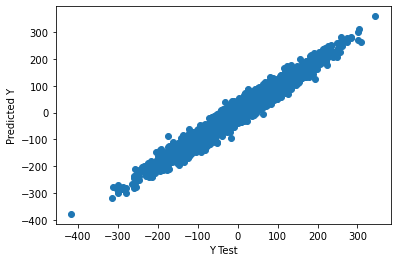

In [142]:
plt.scatter(w_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [143]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(w_test, pred))
print('MSE:', metrics.mean_squared_error(w_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(w_test, pred)))

MAE: 16.232067668336278
MSE: 410.0234403997351
RMSE: 20.24903554245819


In [144]:
print('\nIntercept : ',lm.intercept_)


Intercept :  -0.2811263071730249


In [145]:
print('Variance score: ',lm.score(B_test, w_test))

Variance score:  0.9583422182425166


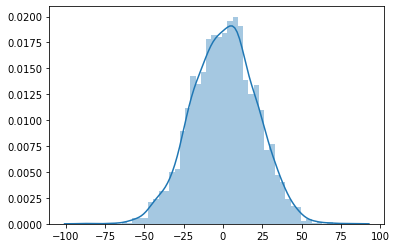

In [146]:
sns.distplot((w_test-pred),bins=50);

In [147]:
accuracy = lm.score(B_train, w_train)
print("accuracy = ", accuracy * 100, "%")
accuracy = lm.score(B_test, w_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  95.91527548194786 %
accuracy =  95.83422182425167 %
